# Classification of Images on Fashion MNIST Dataset with Convolutional Neural Networks

In [20]:
# Importing required libraries

import tensorflow as tf
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load Fashion MNIST Dataset from Keras
from keras.datasets import fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [22]:
# Display shapes of train_data and test_data

print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [23]:
# Assign label names to classes in an array

label_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

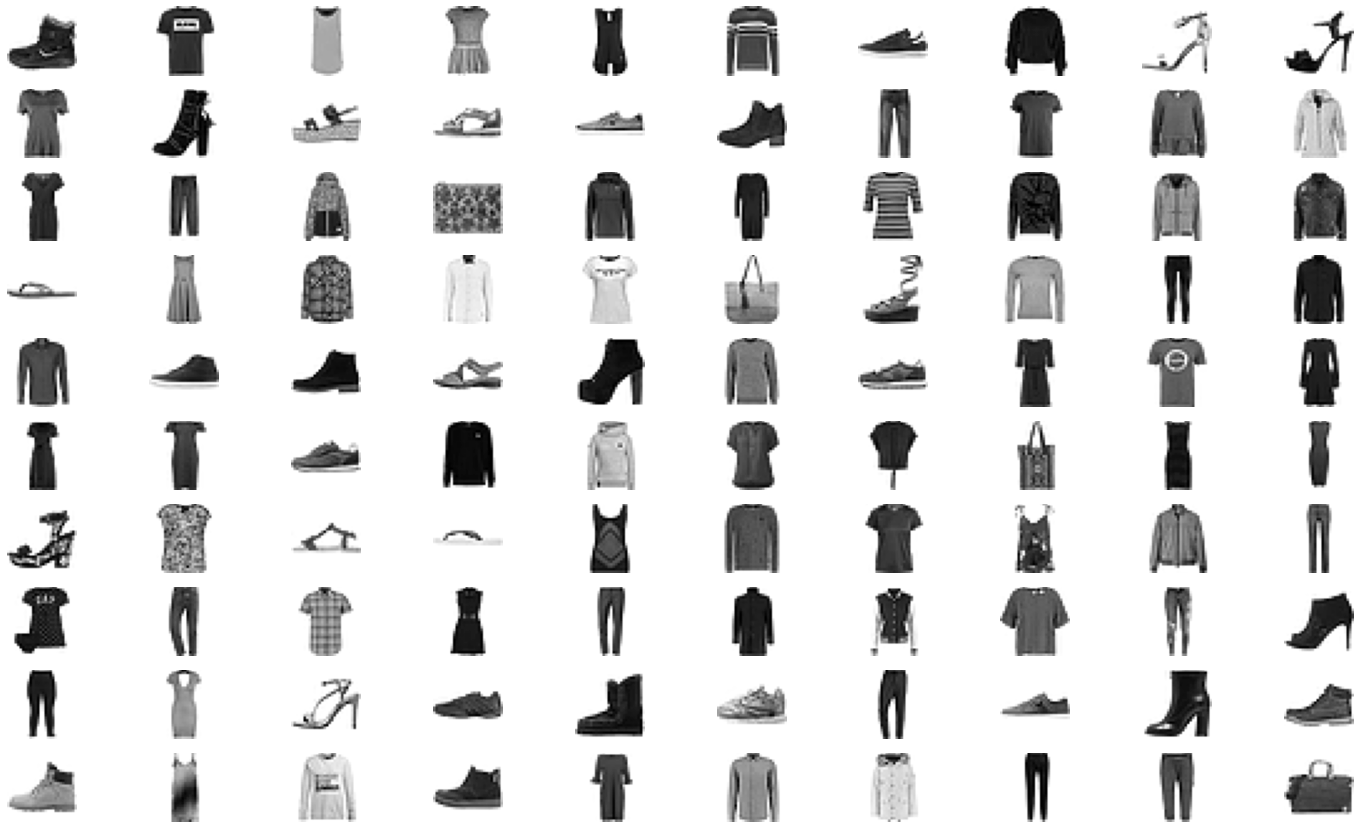

In [24]:
# Visualize first 100 images from the train dataset

plt.figure(figsize=(25,15))

for i in range(100):
  plt.subplot(10,10, i+1)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()

In [25]:
# The inputs, outputs, and weights of a neural network are continuous numbers. The whole math for neural networks is continuous, not discrete, and this is best approximated with floating point numbers. Hence the images are converted to float32 datatype
# The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values are normalized to the range [0,1] by dividng through by 255

train_images = train_data.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_data.reshape((-1, 28, 28,1))
test_images = test_images.astype('float32')/255

print(test_images.shape)

(10000, 28, 28, 1)


In [26]:
# Designing the layers of the neural network.

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [28]:
# Compiling the models and assigning the metric, loss function and optimizer parameters.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
            )

In [29]:
# Fiting the train dataset to train the model. Epoch and Batch sizes were also tweaked to train the model.

model.fit(
    train_images, train_label,
    batch_size = 32,
    epochs = 10,
    verbose = 0,
    validation_split = 0.2
  )

In [30]:
# Evaluating how the model performs on the test dataset

test_loss, test_accuracy = model.evaluate(test_images, test_label)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3183 - accuracy: 0.9167
0.916700005531311


In [31]:
# Extract the model class probability predictions on the test dataset

predictions = model.predict(test_images)


313/313 [==============================] - 2s 6ms/step


In [32]:
predictions.shape

(10000, 10)

In [33]:
# Extract the classes with the highest probability

predictions = predictions.argmax(axis=1)

In [34]:
predictions.shape

(10000,)

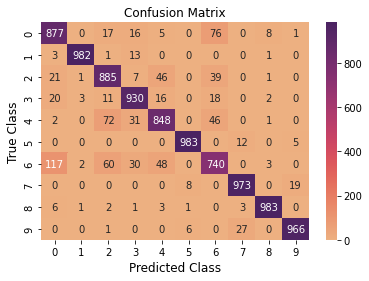

In [35]:
# Plot a confusion matrix for all classes of the dataset

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(test_label,predictions) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [36]:
# Print the Classification report

print(classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.89      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.88      0.85      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.74      0.77      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

